In [322]:
# Loading Libraries
import os
import numpy as np
from surprise import BaselineOnly
from surprise.dataset import Dataset
from surprise.reader import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import csv
import matplotlib.mlab as mlab
from surprise.model_selection import train_test_split

# Part 3: MovieLens Dataset

In [70]:
# loading the data
file_path_ratings = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/ratings.csv')
file_path_movies = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/movies.csv')

movie_list = []

user_id = []
movie_id = []
ratings = []

# loading the movie list
with open(file_path_movies) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        movie_list.append(int(row['movieId']))

# loading the user_id and ratings
with open(file_path_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

In [71]:
# Making the R matrix
# There are 671 users and 9125 movies
R = np.zeros((671, 9125))
for i in xrange(0, np.size(user_id)):
    x = user_id[i] - 1
    y = movie_list.index(movie_id[i])    
    R[x,y] = ratings[i]

## Question 2

In [72]:
# Histogram Prep
r = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]
count_r = np.zeros(np.size(r))
for i in ratings:
    x = r.index(i)
    count_r[x] += 1
    

Text(0.5,1,u'Frequency of the Rating Values')

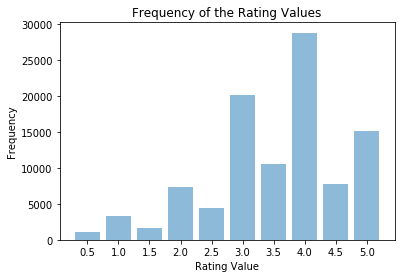

In [73]:
# Plot without zeros
y_pos = np.arange(len(r))
plt.bar(y_pos, count_r, align='center', alpha=0.5)
plt.xticks(y_pos, r)
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.title('Frequency of the Rating Values')

## Question 3

Text(0.5,1,u'Distribution of Ratings Among Movies')

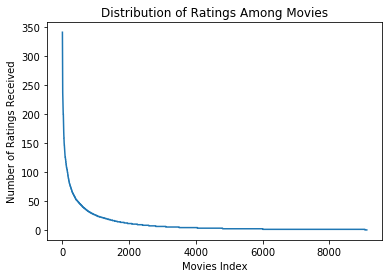

In [74]:
# Count all non zeros
count_m = np.count_nonzero(R, axis=0)
count_m = sorted(count_m, reverse=True)
plt.plot(count_m)
plt.xlabel('Movies Index')
plt.ylabel('Number of Ratings Received')
plt.title('Distribution of Ratings Among Movies')

## Question 4

Text(0.5,1,u'Distribution of Ratings Among User')

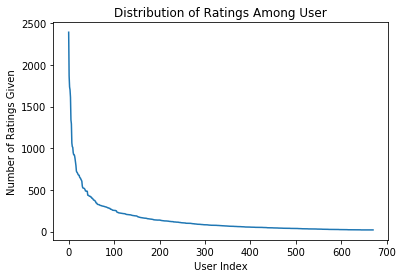

In [75]:
# Count all non zeros
count_u = np.count_nonzero(R, axis=1)
count_u = sorted(count_u, reverse=True)
plt.plot(count_u)
plt.xlabel('User Index')
plt.ylabel('Number of Ratings Given')
plt.title('Distribution of Ratings Among User')

## Question 6

C:\Python27\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """


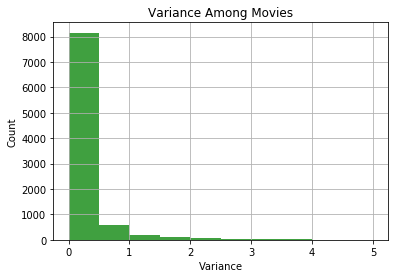

In [76]:
var_m = np.var(R, axis = 0)

bin_size = 0.5; min_edge = 0; max_edge = 5
N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
bin_list = np.linspace(min_edge, max_edge, Nplus1)

plt.hist(var_m, bins=bin_list, facecolor='green', alpha=0.75)
plt.xlabel('Variance')
plt.ylabel('Count')
plt.title('Variance Among Movies')
plt.grid(True)

# Part 4: Neighborhood-based collaborative ﬁltering

In [55]:
# path to dataset file
file_path = os.path.expanduser('~/Documents/GitHub/ee219/Project 3/ml-latest-small/ml-latest-small/ratings.csv')

# As we're loading a custom dataset, we need to define a reader. In the
# movielens dataset, each line has the following format:
# 'user item rating timestamp', separated by ',' characters. because CSV (Comma Separated Values)
# We skip the first line 
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file(file_path, reader=reader)

## Question 10

In [190]:
# Making sure we are using Pearson and User Base methods
sim_options = {'name': 'pearson', 'user_base': True}

# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE = []
MAE = []

# Sweep through different k values
for k in xrange(2, 102, 2):
    print 'k = ', k
    knn = KNNWithMeans(k = k, sim_options = sim_options)
    temp_rmse = []
    temp_mae = []
    for train, test in kf.split(data):
        knn.fit(train)
        pred = knn.test(test)
        temp_rmse = accuracy.rmse(pred, verbose = False)
        temp_mae = accuracy.mae(pred, verbose = False)
    RMSE.append(np.mean(temp_rmse))
    MAE.append(np.mean(temp_mae))

k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simi

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

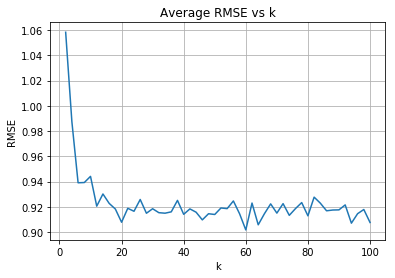

In [216]:
# Plot RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('Average RMSE vs k')
plt.grid(True)


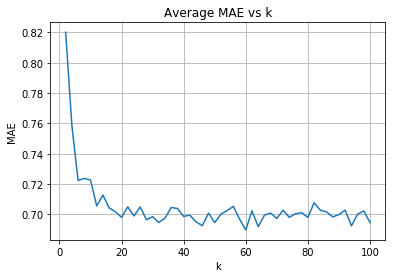

In [218]:
# Plot MAE
plt.plot(x, MAE)
plt.xlabel('k')
plt.ylabel('MAE')
plt.title('Average MAE vs k')
plt.grid(True)

## Question 12, 13, 14

In [105]:
# Finding the number of ratings per movie
count_m = np.count_nonzero(R, axis=0)
# var_m = variance of movies
var_m = np.var(R, axis = 0)
# movie_list has the list of movie_ids to correlate it with the position in array

In [111]:
## Testdata is split into 3 columns (user_id-string, movie_id-)
def trim(testdata):
    popular = []
    nonpopular = []
    high_var = []
    
    for i in xrange(0, np.size(a,0), 1):
        index = movie_list.index(int(testdata[i][1]) ) 
                                 
        # Testing for popular/nonpopular   
        if count_m[index] > 2:
            popular.append(testdata[i])
        else:
            nonpopular.append(testdata[i])
        
        # Testing for high variance
        if (count_m[index] >= 5) and (var_m[index] >= 2):
            high_var.append(testdata[i])
                                 
    
    return popular, nonpopular, high_var

In [140]:
# Making sure we are using Pearson and User Base methods
sim_options = {'name': 'pearson', 'user_base': True}

# We want 10 folds
kf = KFold(n_splits=10)

# Making RMSE & MAE arrays
RMSE_P = []
MAE_P = []
RMSE_NP = []
MAE_NP = []
RMSE_HV = []
MAE_HV = []

# Sweep through different k values
for k in xrange(2, 102, 2):
    print 'k = ', k
    knn = KNNWithMeans(k = k, min_k = k, sim_options = sim_options)
    
    rmse_p = []
    rmse_np = []
    rmse_hv = []
    
    
    for train, test in kf.split(data):
        knn.fit(train)
        
        popular, nonpopular, high_var = trim(test)
        
        # Testing popular
        pred = knn.test(popular)
        if pred != []:
            rmse_p = accuracy.rmse(pred, verbose = True)
        
        # Testing nonpopular
        pred = knn.test(nonpopular)
        if pred != []:
            rmse_np = accuracy.rmse(pred, verbose = True)
        
        # Testing high variance
        pred = knn.test(high_var)
        if pred != []:
            rmse_hv = accuracy.rmse(pred, verbose = True)
        
    RMSE_P.append(np.sum(rmse_p)/10)
    RMSE_NP.append(np.sum(rmse_np)/10)
    RMSE_HV.append(np.sum(rmse_hv)/10)

k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0514
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2258
RMSE: 1.7224
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6220
RMSE: 0.6220
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4380
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4404
RMSE: 0.4005
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4355
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.1068
RMSE: 0.5440
RMSE: 0.1068
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1796
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1018
RMSE: 1.0795
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5819
RMSE: 0.3021
k 

RMSE: 1.6507
RMSE: 2.3194
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4921
RMSE: 0.2842
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5462
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2593
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7860
k =  20
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.5656
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5719
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0649
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2847
RMSE: 0.1281
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2813
RMSE: 0.3797
Computing the pearson simil

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.2711
k =  36
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4303
RMSE: 0.5851
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4536
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8188
RMSE: 0.6658
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6820
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2922
RMSE: 1.3548
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0265
RMSE: 1.4509
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.8515
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1834
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.3682
RMSE: 0.4560
Computing the pearson simil

Done computing similarity matrix.
RMSE: 0.3609
RMSE: 0.4097
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.3743
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4308
RMSE: 0.0319
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.1341
RMSE: 0.4134
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4518
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.3207
RMSE: 1.5427
RMSE: 0.3207
k =  54
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0703
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6161
RMSE: 0.0301
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4328
RMSE: 0.4812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0736
Computing the pearson similarity matrix...
D

RMSE: 1.5636
k =  70
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0534
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.1570
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6348
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6177
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9204
RMSE: 1.0000
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6267
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7579
RMSE: 0.7579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8564
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2941
k =  72
Computing the pearson similarity matrix...
Do

RMSE: 0.1869
RMSE: 0.2108
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1711
RMSE: 1.1711
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6187
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.4661
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8915
RMSE: 0.4585
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9348
RMSE: 1.0083
k =  88
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0794
RMSE: 1.3899
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.6813
RMSE: 0.6116
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8644
RMSE: 0.8644
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.5773
Computing the pearson similarity matrix...
Done computing similarity matrix.
R

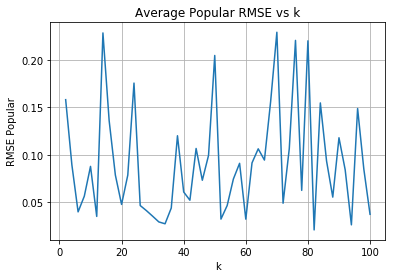

In [219]:
# Plot Popular RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_P)
plt.xlabel('k')
plt.ylabel('RMSE Popular')
plt.title('Average Popular RMSE vs k')
plt.grid(True)

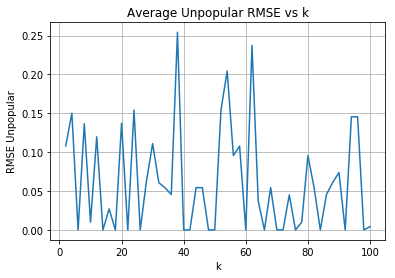

In [222]:
# Plot Unpopular RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_NP)
plt.xlabel('k')
plt.ylabel('RMSE Unpopular')
plt.title('Average Unpopular RMSE vs k')
plt.grid(True)

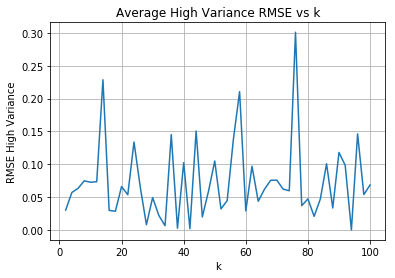

In [221]:
# Plot High Variance RMSE
x = range(2, 102, 2)
plt.plot(x, RMSE_HV)
plt.xlabel('k')
plt.ylabel('RMSE High Variance')
plt.title('Average High Variance RMSE vs k')
plt.grid(True)

In [145]:
# Printing Minimum Value for Average RMSE 
print 'min RMSE (popular): ', min(RMSE_P)
print 'min RMSE (unpopular): ', min(RMSE_NP)
print 'min RMSE (high variance): ', min(RMSE_HV)

min RMSE (popular):  0.0206435412532
min RMSE (unpopular):  0.0
min RMSE (high variance):  1.37188723242e-05


## Question 15

In [320]:
# sample random trainset and testset
# test set is made of 10% of the ratings.
trainset, testset = train_test_split(data, test_size=.1)
threshold = [2.5,3.0,3.5,4.0]
sim_options = {'name': 'pearson', 'user_base': True}

knn = KNNWithMeans(k = 30, sim_options = sim_options)
knn.fit(trainset)
pred = knn.test(testset)



Computing the pearson similarity matrix...
Done computing similarity matrix.


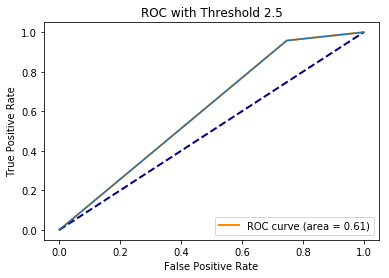

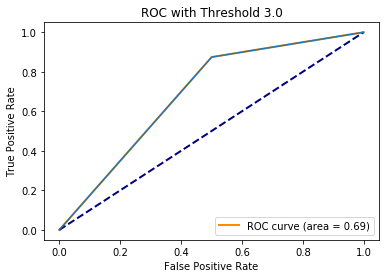

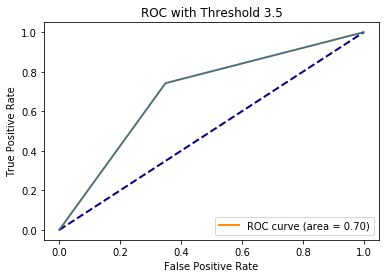

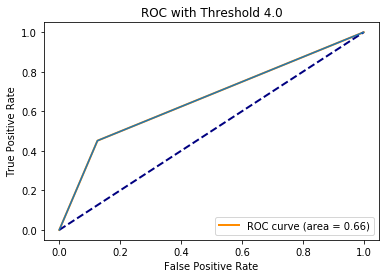

In [321]:
for i in threshold:
    # Adding predicted values and actual into an arry
    predicted = []
    actual = []
    
    for j in xrange(0, len(testset), 1):
        predicted.append(0 if pred[j].est < i else 1)
        actual.append(0 if testset[j][2] < i else 1)
    
    # Calculate fpr, tpr, area
    fpr, tpr, threshOut = roc_curve(actual, predicted)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw= 2, linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC with Threshold %0.1f' % i)
    plt.legend(loc="lower right")